In [1]:
import importlib
from sklearn.datasets import load_digits
import zlib
import json

import numpy as np

import run_ambreducer as ramb
importlib.reload(ramb)

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import os

/home/hj/anaconda3/envs/cambiguity/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
### read datasets

def read_dataset_by_path(path):
	path_data = path + "data.bin"
	path_labels = path + "label.bin"
	## open the data and label binary file
	with open(path_data, 'rb') as f:
		data_comp = f.read()
	with open(path_labels, 'rb') as f:
		labels_comp = f.read()
	## convert the data and label to np array
	data = np.array(json.loads(zlib.decompress(data_comp).decode('utf8')))
	labels = np.array(json.loads(zlib.decompress(labels_comp).decode('utf8')))

	return data, labels


data, labels = read_dataset_by_path("../labeled-datasets/compressed/fashion_mnist/")
raw = PCA(n_components=100).fit_transform(data)

raw.shape

(3000, 100)

In [4]:

method = "umap"
metric = "snc"
init_points = 10
n_iter = 50

results = ramb.run(raw, method=method, metric=metric, threshold_loss=0.05, S=3.0, verbose=2, init_points=init_points, n_iter=n_iter)



|   iter    |  target   | min_dist  | n_neig... |
-------------------------------------------------
|  1        |  0.826    |  0.417    |  144.6    |
|  2        |  0.8157   |  0.000114 |  61.86    |
|  3        |  0.8205   |  0.1468   |  20.28    |
|  4        |  0.8191   |  0.1863   |  70.42    |
|  5        |  0.8238   |  0.3968   |  108.7    |
|  6        |  0.8332   |  0.4192   |  137.7    |
|  7        |  0.8345   |  0.2045   |  175.9    |
|  8        |  0.8308   |  0.02739  |  134.8    |
|  9        |  0.8365   |  0.4173   |  112.6    |
|  10       |  0.8363   |  0.1404   |  41.22    |
|  11       |  0.8287   |  0.6587   |  114.5    |
|  12       |  0.833    |  0.2579   |  42.74    |
|  13       |  0.817    |  0.9643   |  38.97    |
|  14       |  0.8212   |  0.8896   |  111.6    |
|  15       |  0.8318   |  0.3956   |  33.97    |
|  16       |  0.8235   |  0.8877   |  90.55    |
|  17       |  0.8313   |  0.4323   |  71.7     |
|  18       |  0.8367   |  0.1107   |  41.19    |


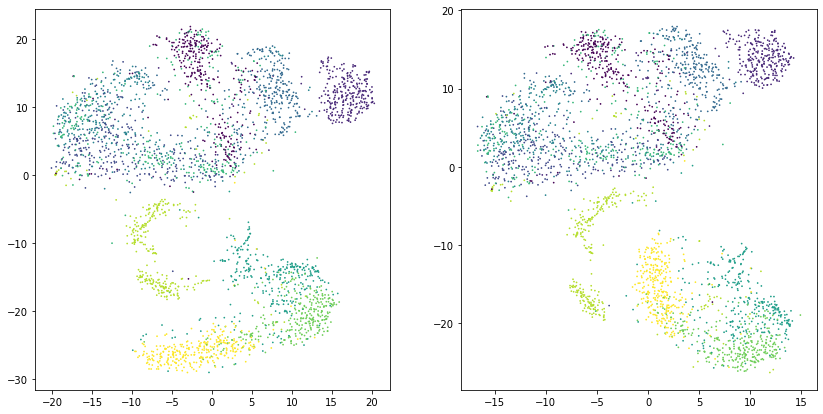

In [108]:



fig, ax = plt.subplots(1, 2, figsize=(14, 7))

init_emb = results["init_emb"]
final_emb = results["final_emb"]

ax[0].scatter(init_emb[:, 0], init_emb[:, 1], s=0.5, c=labels)
ax[1].scatter(final_emb[:, 0], final_emb[:, 1], s=0.5,c=labels)

In [89]:
results

{'init_emb': array([[-1.8176762 , -1.928759  ],
        [-0.69835156,  1.0116882 ],
        [-8.117238  ,  0.9894452 ],
        ...,
        [-3.6637797 , -5.3875384 ],
        [ 5.3846025 ,  3.160565  ],
        [-4.823679  ,  1.3524088 ]], dtype=float32),
 'final_emb': array([[-0.8184458, -2.2006593],
        [-0.651748 ,  0.691841 ],
        [-6.7322593, -0.7458081],
        ...,
        [-1.2731018, -4.3190365],
        [ 3.326309 ,  4.0686874],
        [-4.173453 ,  0.3031864]], dtype=float32),
 'init_loss': 0.29759720268678935,
 'final_loss': 0.564491221107245,
 'max_hyperparameter': {'perplexity': 359.01873635434765},
 'initial_embiguity': 0.4768921358761593,
 'final_ambiguity': 0.43550877889275497,
 'init_max_hyperparameter': {'perplexity': 260.57511098092533}}